In [314]:
import numpy as np
import pandas as pd
import os
import csv

In [315]:
elec_df = pd.read_csv('C:\\Users\\shash\\Desktop\\Capstone\\hpc_breakdowns.csv')
elec_df.sample(3)

,Unnamed: 0,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1223025,1227164,16/4/2009,22:08:00,2.754,0.110,236.14,11.6,1.0,1.0,17.0
39507,39511,13/1/2007,03:55:00,0.400,0.298,244.50,2.0,0.0,1.0,0.0
168278,168287,12/4/2007,14:11:00,0.286,0.082,238.96,1.2,0.0,0.0,0.0


In [316]:
# Slice 200000 for project output prediction
elec_train = elec_df[-200001::-1][:]
elec_test = elec_df[-200001:-1][:]

In [317]:
print(elec_test.info())
print(elec_train.info())
print(elec_test.describe())
print(elec_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 1849279 to 2049278
Data columns (total 10 columns):
Unnamed: 0               200000 non-null int64
Date                     200000 non-null object
Time                     200000 non-null object
Global_active_power      199954 non-null float64
Global_reactive_power    199962 non-null float64
Voltage                  199973 non-null float64
Global_intensity         199810 non-null float64
Sub_metering_1           199905 non-null float64
Sub_metering_2           199918 non-null float64
Sub_metering_3           200000 non-null float64
dtypes: float64(7), int64(1), object(2)
memory usage: 15.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1849280 entries, 1849279 to 0
Data columns (total 10 columns):
Unnamed: 0               int64
Date                     object
Time                     object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity     

In [318]:
import re
elec_train["Hour"]= elec_train["Time"].apply(lambda x: (x[:2]))
#elec_train["Year"]= elec_train["Date"].apply(lambda x: (x[-4:]))
#elec_train["Month"]= elec_train["Date"].apply(lambda x: int(re.split(r'/',x)[1]))
elec_train.drop(elec_train.columns[[0,1,2]], axis = 1, inplace = True)
elec_train.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour
1849279,0.374,0.202,235.70,1.8,0.0,0.0,0.0,07
1849278,0.376,0.204,236.15,1.8,0.0,0.0,1.0,07
1849277,0.378,0.204,236.54,1.8,0.0,0.0,1.0,07
1849276,0.386,0.216,236.69,1.8,0.0,0.0,0.0,07
1849275,0.450,0.322,236.90,2.4,0.0,2.0,1.0,07


In [251]:
# Correlation

In [7]:
elec_train.corrwith(elec_train['Global_intensity'])

Global_active_power      0.998920
Global_reactive_power    0.268457
Voltage                 -0.409553
Global_intensity         1.000000
Sub_metering_1           0.490148
Sub_metering_2           0.443356
Sub_metering_3           0.622682
dtype: float64

In [8]:
elec_train.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.250001,-0.397770,0.998920,0.485627,0.437460,0.634829
Global_reactive_power,0.250001,1.000000,-0.116041,0.268457,0.130711,0.140119,0.084316
Voltage,-0.397770,-0.116041,1.000000,-0.409553,-0.196699,-0.168990,-0.264535
Global_intensity,0.998920,0.268457,-0.409553,1.000000,0.490148,0.443356,0.622682
Sub_metering_1,0.485627,0.130711,-0.196699,0.490148,1.000000,0.055715,0.104600
Sub_metering_2,0.437460,0.140119,-0.168990,0.443356,0.055715,1.000000,0.080673
Sub_metering_3,0.634829,0.084316,-0.264535,0.622682,0.104600,0.080673,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B5CC0AA08>,
      dtype=object)

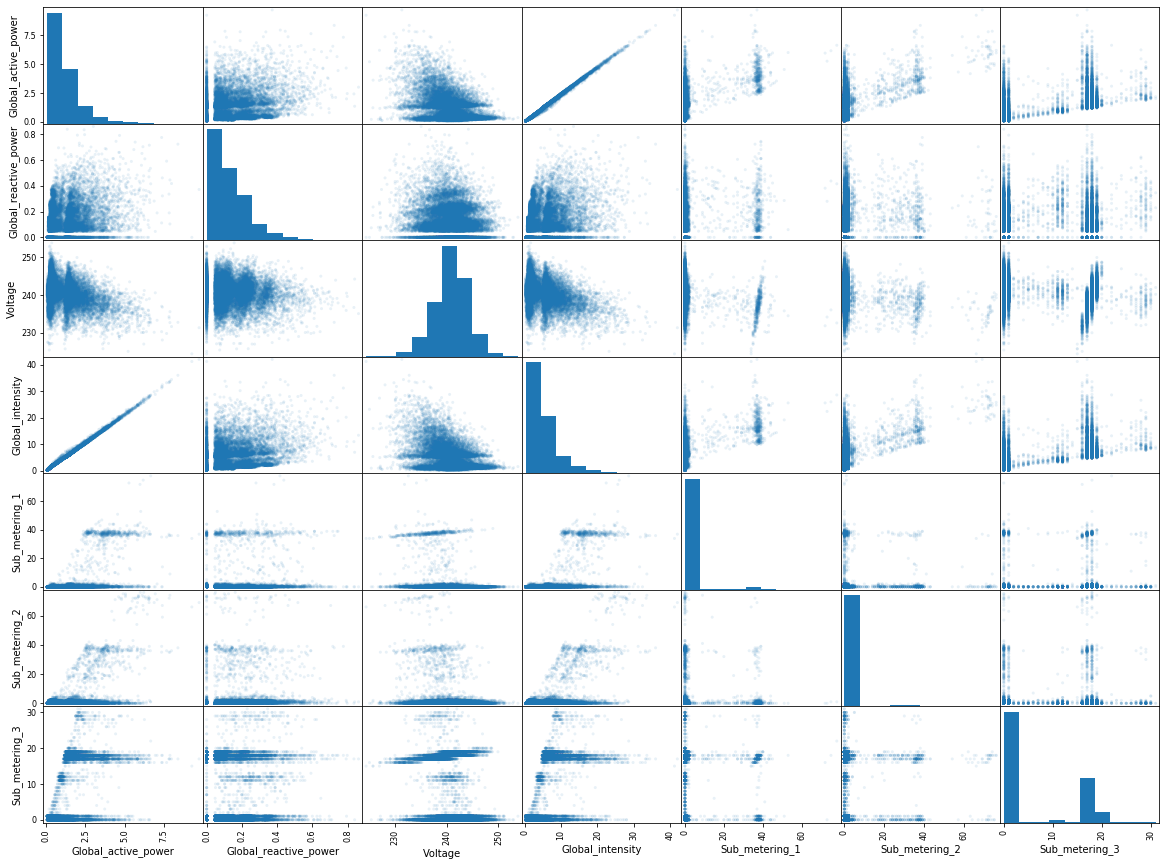

In [17]:
# Plot every numerical attribute against every other
pd.plotting.scatter_matrix(elec_train.sample(20000), figsize =(20,15), alpha = 0.1)

In [ ]:
# Outliers

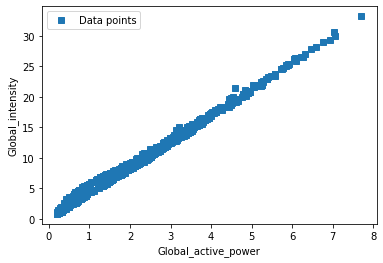

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(elec_train.tail(2000)['Global_active_power'], elec_train.tail(2000)['Global_intensity'], linewidth=0, marker='s', label='Data points')
ax.set_xlabel('Global_active_power')
ax.set_ylabel('Global_intensity')
ax.legend(facecolor='white')
plt.show()

In [24]:
from scipy import stats
Q1 = elec_train.quantile(0.25)
Q3 = elec_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Global_active_power       1.234
Global_reactive_power     0.144
Voltage                   4.000
Global_intensity          5.000
Sub_metering_1            0.000
Sub_metering_2            1.000
Sub_metering_3           17.000
dtype: float64


In [25]:
a=(elec_train < (Q1 - 1.5 * IQR)) |(elec_train > (Q3 + 1.5 * IQR))
elec_train_out = elec_train[~(a).any(axis=1)]
a.shape

(1849280, 8)

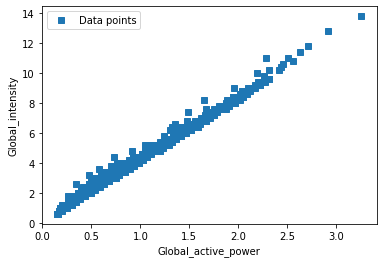

In [27]:
fig, ax = plt.subplots()
ax.plot(elec_train_out.head(4000)['Global_active_power'], elec_train_out.head(4000)['Global_intensity'], linewidth=0, marker='s', label='Data points')
ax.set_xlabel('Global_active_power')
ax.set_ylabel('Global_intensity')
ax.legend(facecolor='white')
plt.show()

In [149]:
elec_train.drop(elec_train.columns[[8,9]], axis = 1, inplace = True)

In [265]:
print('Voltage Null values:',elec_train[elec_train['Voltage'].isnull()].shape[0])

Voltage Null values: 2004


In [ ]:
# Plot

In [ ]:
import seaborn as sb
sb.regplot(x='Global_active_power', y='Global_intensity', data=elec_train, scatter=True)

In [ ]:
#from scipy import stats
#Q1 = elec_train.quantile(0.25)
#Q3 = elec_train.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)

In [ ]:
# Outliners
#a=(elec_train < (Q1 - 1.5 * IQR)) |(elec_train > (Q3 + 1.5 * IQR))
#a['Gloabl_intensity']=a['Global_intensity'].apply(lambda x: False)
#a['Global_active_power']=a['Global_reactive_power'].apply(lambda x: False)
#a['Voltage']=a['Voltage'].apply(lambda x: False)
#a['Sub_metering_1']=a['Sub_metering_1'].apply(lambda x: False)
#a['Sub_metering_2']=a['Sub_metering_2'].apply(lambda x: False)
#a['Sub_metering_2']=a['Sub_metering_3'].apply(lambda x: False)
#elec_train_out = elec_train[~(a).any(axis=1)]
#elec_train_out.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
elec_train.Global_active_power.plot(kind='hist',bins=20)
#elec_train_out.Global_active_power.plot(kind='hist',bins=20)
plt.title('Global Active Power Histogram', fontsize=24)
plt.xlabel('Global Active Power', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

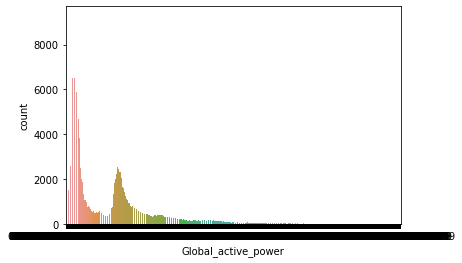

In [29]:
import seaborn as sb
import matplotlib.pyplot as plt
elec_train['Global_active_power'].value_counts(dropna=False)

sb.countplot(x="Global_active_power", data=elec_train)
plt.show()

In [189]:
# Assign a bin label to each row
elec_train['Global_active_fixed'] = elec_train.Global_active_power.apply(\
                            lambda x: np.round(x*100)/100 if x < 0.4 and x > 0.29 else 0)

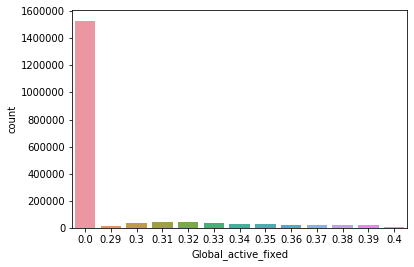

In [190]:
sb.countplot(x="Global_active_fixed", data=elec_train,)
plt.show()

In [297]:
elec_train[elec_train["Global_active_power"].isnull()].shape

(1997, 8)

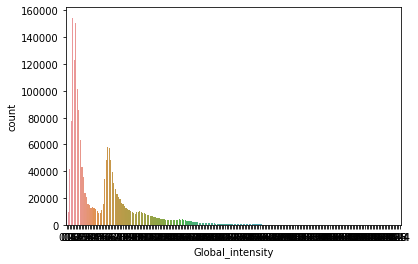

In [269]:
sb.countplot(x="Global_intensity", data=elec_train)
plt.show()

In [212]:
elec_train['Global_int_fixed'] = elec_train.Global_intensity.apply(\
                            lambda x: np.floor(x) if x <10 else 0)

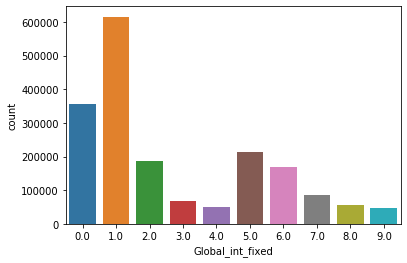

In [213]:
sb.countplot(x="Global_int_fixed", data=elec_train,)
plt.show()

In [311]:
print("Reactive Power Null values ", elec_train[elec_train["Global_reactive_power"].isnull()].shape)
print("Sub Meter 1 Null values ",elec_train[elec_train["Sub_metering_1"].isnull()].shape)
print("Sub Meter 2 Null values ",elec_train[elec_train["Sub_metering_2"].isnull()].shape)
print("Sub Meter 3 Null values ",elec_train[elec_train["Sub_metering_3"].isnull()].shape)

Reactive Power Null values  (439, 8)
Sub Meter 1 Null values  (1202, 8)
Sub Meter 2 Null values  (1128, 8)
Sub Meter 3 Null values  (129, 8)


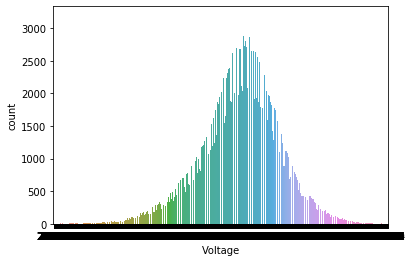

In [270]:
elec_train['Voltage'].value_counts(dropna=False)

sb.countplot(x="Voltage", data=elec_train)
plt.show()

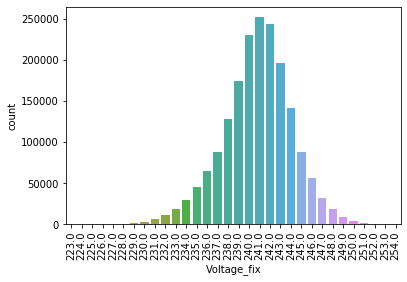

In [218]:
plt.xticks(rotation=90)
elec_train['Voltage_fix'] = elec_train.Voltage.apply(\
                            lambda x: np.round(x) )
sb.countplot(x="Voltage_fix", data=elec_train)
plt.show()

In [319]:
elec_train_Null = elec_train[elec_train["Voltage"].isnull()].index.tolist()
elec_train['Voltage'].iloc[elec_train_Null] = 241

C:\Users\Amal\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [240]:
elec_train['Voltage'].mean()

240.79803689468807

In [232]:
elec_train['Global_intensity'].mean()

4.699899546088345

In [ ]:
elec_train['Global_active_power'].mean()

In [ ]:
# Drop Null Values

In [320]:
elec_train.dropna(axis = 0, inplace = True)

In [321]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [322]:
elec_train_dum = pd.get_dummies(elec_train,drop_first=True)
elec_y = elec_train_dum[['Global_intensity']]
elec_X = elec_train_dum.drop(columns ='Global_intensity')
print(elec_X)
print(elec_y)

         Global_active_power  Global_reactive_power  Voltage  Sub_metering_1  \
1849279                0.374                  0.202   235.70             0.0   
1849278                0.376                  0.204   236.15             0.0   
1849277                0.378                  0.204   236.54             0.0   
1849276                0.386                  0.216   236.69             0.0   
1849275                0.450                  0.322   236.90             0.0   
...                      ...                    ...      ...             ...   
4                      3.666                  0.528   235.68             0.0   
3                      5.388                  0.502   233.74             0.0   
2                      5.374                  0.498   233.29             0.0   
1                      5.360                  0.436   233.63             0.0   
0                      4.216                  0.418   234.84             0.0   

         Sub_metering_2  Sub_metering_3

In [323]:
X_train, X_test , y_train , y_test = train_test_split(elec_X,elec_y,test_size=.3,random_state=26)
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
train_scaled = scaler.transform(X_train)
test_scaled = scaler.transform(X_test)
lr_mod = LinearRegression()
lr_mod.fit(train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [324]:
lr_mod.score(train_scaled, y_train)

0.9985907273334235

In [325]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lr_mod.predict(test_scaled)
r2_score(y_test, y_pred)

0.9985694463784507

In [326]:
elec_test["Hour"]= elec_test["Time"].apply(lambda x: (x[:2]))
elec_test.drop(elec_test.columns[[0,1,2]], axis = 1, inplace = True)
elec_test.dropna(axis = 0, inplace = True)
elec_test.head(2)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Hour
1849279,0.374,0.202,235.70,1.8,0.0,0.0,0.0,07
1849280,0.376,0.208,237.01,1.8,0.0,0.0,1.0,07


In [327]:
elec_test['Real'] = 1
elec_train['Real'] = 0
combine = pd.concat([elec_train, elec_test])
elec_test_dum = pd.get_dummies(combine,drop_first=True)

In [328]:
elec_test = elec_test_dum[elec_test_dum['Real']==1]
elec_test.drop(columns = 'Real', axis =1, inplace = True)
elec_train = elec_test_dum[elec_test_dum['Real']==0]
elec_train.drop(columns = 'Real',axis =1, inplace = True)

C:\Users\Amal\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [329]:
unseen_y = elec_test[['Global_intensity']]
unseen_X = elec_test.drop(columns='Global_intensity',axis=1)
unseen_scaled = scaler.transform(unseen_X)

In [330]:
lr_mod.score(unseen_scaled, unseen_y)

0.9979276753702544

In [334]:
y_pred = lr_mod.predict(unseen_scaled)

In [335]:
y_pred = pd.DataFrame(y_pred)
elec_test['GI_pred']= y_pred[0]
elec_test['GI_pred'][:]= y_pred[0]

C:\Users\Amal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Amal\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Amal\Anaconda3\lib\site-packages\pandas\core\series.py:1237: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.

In [337]:
elec_test['G15_actual']=elec_test['Global_intensity'].apply(/
                        lambda x: '>15' if x>15 else '<15')
elec_test['G15_pred']=elec_test['GI_pred'].apply(/
                        lambda x: '>15' if x>15 else '<15')

C:\Users\Amal\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Amal\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [338]:
from sklearn.metrics import classification_report, confusion_matrix
print('CONFUSION MATRIX')
print(confusion_matrix(elec_test['G15_actual'], elec_test['G15_pred']))
print('CLASSIFICATION REPORT')
print(classification_report(elec_test['G15_actual'], elec_test['G15_pred']))

CONFUSION MATRIX
[[195778    170]
 [    83   3491]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

         <15       1.00      1.00      1.00    195948
         >15       0.95      0.98      0.97      3574

    accuracy                           1.00    199522
   macro avg       0.98      0.99      0.98    199522
weighted avg       1.00      1.00      1.00    199522

